# LAB 4: Gram-Schmidt and Eigenvalues & Eigenvectors



In this lab you will use Python to study the following topics:

- The Gram-Schmidt Algorithm to change an independent set of vectors into anorthonormal set.

- Determination of eigenvalues and eigenvectors using the characteristic polynomial of a matrix

- Use of eigenvectors to transform a matrix to diagonal form.


# First: you should run this cell

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))

#  Question 1 : Gram-Schmidt Orthogonalization

#### Generate three random vectors in $R^3$ by

- `u1 = np.array([[4], [9], [6]])`
- `u2 = np.array([[6], [8], [8]])`
- `u3 = np.array([[0], [9], [6]])`

- Check whether they are linearly independent by calculating `np.linalg.matrix_rank(np.block([u1, u2, u3]))`.
- If the answer is not 3, then generate a new random set of vectors and calculate the rank. Repeat until the rank is 3. Now use these vectors in the following calculations.

In [11]:
def generatevect():
    
    u1=rvect(3)
    u2 =rvect(3)
    u3=rvect(3)
    m =np.block([u1, u2, u3])
    return m,[u1,u2,u3]
    

  
n=generatevect()

while np.linalg.matrix_rank(n[0]) !=3:
    n=generatevect()
    

print("--------u1------------")
print(n[1][0])
print("---------------------")
print("--------u2------------")
print(n[1][1])
print("---------------------")
print("--------u3------------")
print(n[1][2])
print("---------------------")

print("--------rank([u1, u2, u3])------------")
print(np.linalg.matrix_rank(n[0]))
print("---------------------")

--------u1------------
[[6.]
 [7.]
 [1.]]
---------------------
--------u2------------
[[3.]
 [0.]
 [3.]]
---------------------
--------u3------------
[[3.]
 [0.]
 [4.]]
---------------------
--------rank([u1, u2, u3])------------
3
---------------------


In [2]:
#type your code here:



--------u1------------
[[4]
 [9]
 [6]]
---------------------
--------u2------------
[[6]
 [8]
 [8]]
---------------------
--------u3------------
[[0]
 [9]
 [6]]
---------------------
--------rank([u1, u2, u3])------------
3
---------------------


#### Plot the three vectors in the graphics window as red, green, and blue dotted lines by the commands:
- `r = np.arange(0, 1, 0.05)`
- `ax = plt.axes(projection='3d')`
- `ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')`
- `ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')`
- `ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')`

#### Determine visually whether the vectors are mutually orthogonal or not.

### ---------------------------------------------------Write your answer here--------------------------------------------



the vectors are not orthogonal



### --------------------------------------------------------------------------------------------------------------------------------

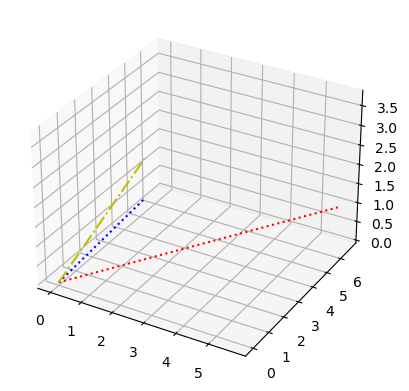

In [12]:
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.plot3D(r * n[1][0][0], r * n[1][0][1], r * n[1][0][2], 'r:')
ax.plot3D(r * n[1][1][0], r * n[1][1][1], r * n[1][1][2], 'b:')
ax.plot3D(r * n[1][2][0], r * n[1][2][1], r * n[1][2][2], 'y-.')

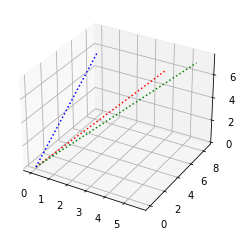

In [3]:
#type your code here


#### (b) Now use the vectors u1, u2, u3 to obtain an orthogonal basis for R3, following the Gram-Schmidt algorithm. Set `v1 = u1`. Obtain v2 by removing the component of u2 in the direction v1:


\\[v_2 = u_2 - \frac{v_1 \cdot u_2}{v_1 \cdot v_1}v_1\\]

- Calculate the dot product to check that the vectors v1 and v2 are mutually orthogonal (within a negligible numerical error). Also add v2 to your graphics window as a dashed-dotted green line.

--------v1------------
[[6.]
 [7.]
 [1.]]
---------------------
--------v2------------
[[ 1.53488372]
 [-1.70930233]
 [ 2.75581395]]
---------------------
--------v1 . v2------------
[[0.]]
---------------------


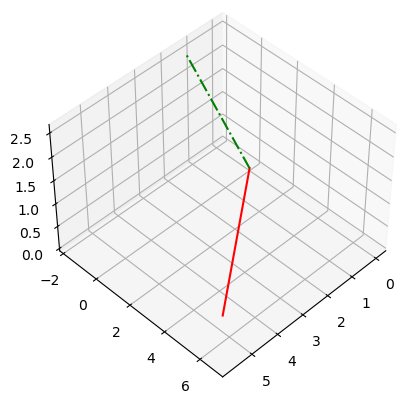

<Figure size 5000x10000 with 0 Axes>

In [13]:
v1=n[1][0]
v2=n[1][1]-((v1.T.dot(n[1][1])/(v1.T.dot(v1)))*v1)

print("--------v1------------")
print(v1)
print("---------------------")
print("--------v2------------")
print(v2)
print("---------------------")
print("--------v1 . v2------------")
print(v1.T.dot(v2).round(10))
print("---------------------")

r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
fig = plt.figure(figsize = (50, 100))
ax.view_init(45, 45)
ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r-',)
ax.plot3D(r *v2[0], r * v2[1], r * v2[2], 'g-.')

--------v1------------
[[4]
 [9]
 [6]]
---------------------
--------v2------------
[[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]
---------------------
--------v1 . v2------------
[[0.]]
---------------------


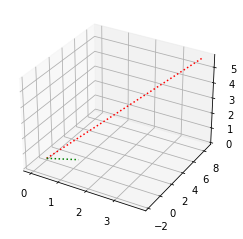

In [4]:
#type your code here


#### Now obtain v3 by removing the components of u3 in the directions of v1 and v2:

\\[v_3 = u_3 - \frac{v_1 \cdot u_3}{v_1 \cdot v_1}v_1 - \frac{v_2 \cdot u_3}{v_2 \cdot v_2}v_2\\\\]
- Calculate dot products by python to check that v3 is orthogonal to the vectors v1 and v2 (within a negligible numerical error). Add v3 to your plot as a dashed-dotted blue line by

In [15]:
v3=n[1][2]-((v1.T.dot(n[1][2]))/v1.T.dot(v1)*v1)-((v2.T.dot(n[1][2]))/v2.T.dot(v2)*v2)
  

print("--------v3------------")
print(v3)
print("---------------------")
print("--------v1 . v3------------")
print(v1.T.dot(v3).round(10))
print("---------------------")
print("--------v2 . v3------------")
print(v2.T.dot(v3).round(10))
print("---------------------")

--------v3------------
[[-0.39837398]
 [ 0.28455285]
 [ 0.39837398]]
---------------------
--------v1 . v3------------
[[-0.]]
---------------------
--------v2 . v3------------
[[0.]]
---------------------


In [5]:
#type your code here


--------v3------------
[[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]
---------------------
--------v3 . v1------------
[[-1.77635684e-15]]
---------------------
--------v3 . v2------------
[[8.8817842e-16]]
---------------------


#### Add v3 to your plot as a dashed-dotted blue line. Obtain a good alignment of the graph that shows orthogonality in perspective using:
- `ax.view_init(angle1, angle2)`

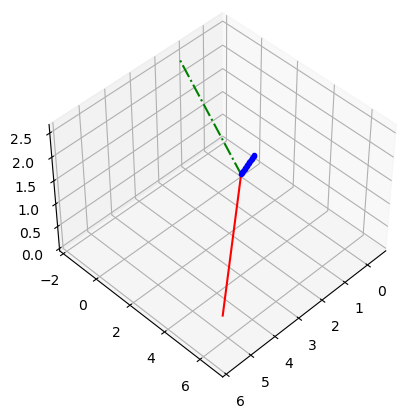

<Figure size 5000x10000 with 0 Axes>

In [16]:
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
fig = plt.figure(figsize = (50, 100))
ax.view_init(45, 45)
ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r-',)
ax.plot3D(r *v2[0], r * v2[1], r * v2[2], 'g-.')
ax.plot3D(r *v3[0], r * v3[1], r * v3[2], 'b.')

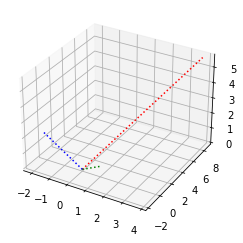

In [6]:
#type your code here


#### (c) The last step in the Gram-Schmidt algorithm is to rescale the vectors v1, v2, v3 to obtain an orthonormal basis for R3:

- `w1 = v1 / np.linalg.norm(v1)`
- `w2 = v2 / np.linalg.norm(v2)`
- `w3 = v3 / np.linalg.norm(v3)`

#### Define the matrix Q = [w1, w2, w3] and give written answers to the following questions.



- What is the inverse matrix Q Now.

In [17]:
w1 = v1 / np.linalg.norm(v1)
w2 = v2 / np.linalg.norm(v2)
w3 = v3 / np.linalg.norm(v3)

Q=np.column_stack((w1,w2,w3))

print("--------w1------------")
print(w1)
print("---------------------")
print("--------w2------------")
print(w2)
print("---------------------")
print("--------w3------------")
print(w3)
print("---------------------")
print("--------Q------------")
print(Q)
print("---------------------")
print("--------Q.T @ Q------------")
print(Q.T @Q)
print("---------------------")

# print("--------Q.T ------------")
# print(Q.T )
print("---------------------")
print("--------inv(Q)------------")
print(np.linalg.inv(Q))
print("---------------------")

--------w1------------
[[0.64699664]
 [0.75482941]
 [0.10783277]]
---------------------
--------w2------------
[[ 0.42780996]
 [-0.47642473]
 [ 0.76811334]]
---------------------
--------w3------------
[[-0.63116874]
 [ 0.45083482]
 [ 0.63116874]]
---------------------
--------Q------------
[[ 0.64699664  0.42780996 -0.63116874]
 [ 0.75482941 -0.47642473  0.45083482]
 [ 0.10783277  0.76811334  0.63116874]]
---------------------
--------Q.T @ Q------------
[[ 1.00000000e+00  1.03922239e-17 -4.81619129e-16]
 [ 1.03922239e-17  1.00000000e+00  3.49171280e-16]
 [-4.81619129e-16  3.49171280e-16  1.00000000e+00]]
---------------------
---------------------
--------inv(Q)------------
[[ 0.64699664  0.75482941  0.10783277]
 [ 0.42780996 -0.47642473  0.76811334]
 [-0.63116874  0.45083482  0.63116874]]
---------------------


In [7]:
#type your code here:


--------w1------------
[[0.34684399]
 [0.78039897]
 [0.52026598]]
---------------------
--------w2------------
[[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]
---------------------
--------w3------------
[[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]
---------------------
--------Q------------
[[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]
---------------------
--------Q.T @ Q------------
[[ 1.00000000e+00 -6.78742704e-17 -8.48135658e-18]
 [-6.78742704e-17  1.00000000e+00  1.83949226e-16]
 [-8.48135658e-18  1.83949226e-16  1.00000000e+00]]
---------------------
--------inv(Q)------------
[[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]
---------------------


# Question 2. Eigenvectors and Diagonalization

#### (a) Generate a random 3 * 3 integer matrix and test whether its eigenvalues are all real by the commands

- `A = rmat(3,3)`
- Use [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to obtain the eigenvalues of `A` as follows:
    - `w, v = np.linalg.eig(A)`. Where `w` are the eigenvalues and `v`the normalized (unit “length”) eigenvectors, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.
- `z = w - w.real`

If any entry in the vector z is not zero, then the eigenvalues of A are not all real. In this case repeat these commands until you get an A for which z has all zeros.

<div class="alert alert-warning">
    <h4>
        If you generated any matrices with complex eigenvalues, be very careful here! don't use it for the next questions!
    </h4>
</div>

In [18]:
A=rmat(3,3)
w, v = np.linalg.eig(A)
z=w-w.real

count_num=np.count_nonzero(z)
while count_num !=0:
    A=rmat(3,3)
    w, v = np.linalg.eig(A)
    z=w-w.real
    count_num=np.count_nonzero(z)



print("------------A------------------")
print(A)
print("-------------------------------")
print("------------w------------------")
print(w)
print("-------------------------------")
print("------------v------------------")
print(v)
print("-------------------------------")
print("------------z------------------")
print(z)
print("-------------------------------")

------------A------------------
[[3. 0. 8.]
 [6. 0. 2.]
 [0. 0. 1.]]
-------------------------------
------------w------------------
[0. 3. 1.]
-------------------------------
------------v------------------
[[ 0.          0.4472136  -0.17870682]
 [ 1.          0.89442719 -0.98288751]
 [ 0.          0.          0.04467671]]
-------------------------------
------------z------------------
[0. 0. 0.]
-------------------------------


In [8]:
#type your code here:


------------A------------------
[[4. 6. 7.]
 [9. 9. 8.]
 [3. 0. 8.]]
-------------------------------
------------w------------------
[16.30136895 -1.78751922  6.48615027]
-------------------------------
------------v------------------
[[-0.51414231 -0.82693079 -0.2844389 ]
 [-0.8373378   0.50193728 -0.7754785 ]
 [-0.18580392  0.25346488  0.56367331]]
-------------------------------
------------z------------------
[0. 0. 0.]
-------------------------------


#### Now calculate the characteristic polynomial p(t) of your matrix A by

- Symbolic computations are done with `Symbol` class in `sympy`. Read the [documentation](https://docs.sympy.org/latest/gotchas.html#introduction) for many different examples.
- `from sympy.abc import t`
- `I = np.eye(3)`
- `p = sym.det(sym.Matrix(A - t * I))`
- `sym.solve(p)`


#### Plot the characteristic polynomial of A in a graphics window

- `p1 = sym.plot(p, (t, -10, 10), show=False)`
- `p1.show()`

- Adjust the horizontal range of the plot (change [ -10,10] if needed).
- View the graph with a range that shows all three real roots, and include the graph in your lab report. Use the graph to obtain approximate values for the three real roots of p(t).


------------p------------------
-1.0*t**3 + 4.0*t**2 - 3.0*t
------------roots------------------
-------------------------------
[0.0, 1.00000000000000, 3.00000000000000]
-------------------------------


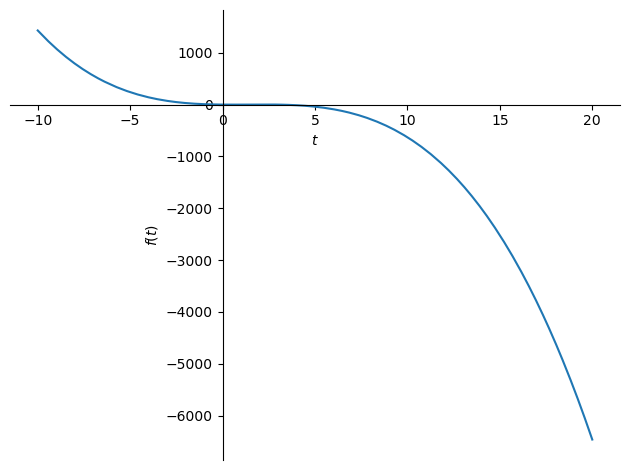

In [19]:
from sympy.abc import t
I = np.eye(3)
p = sym.det(sym.Matrix(A - t * I))
sym.solve(p)

p1 = sym.plot(p, (t, -10, 20), show=False)

print("------------p------------------")
print(p)
print("------------roots------------------")
print("-------------------------------")

print(sym.solve(p))
print("-------------------------------")

p1.show()

------------p------------------
-1.0*t**3 + 21.0*t**2 - 65.0*t - 189.0
-------------------------------
------------roots------------------
[-1.78751922313492 + 0.e-22*I, 6.48615027225818 + 0.e-19*I, 16.3013689508767 - 0.e-21*I]
-------------------------------


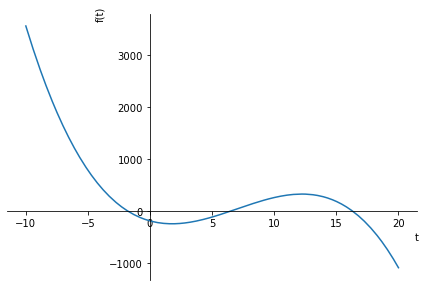

In [9]:
#typr your code here:


#### (b)Use the python to generate a matrix P and a diagonal matrix D. 

- `w, P = np.linalg.eig(A)`
- `D = np.linalg.diag(w)`

- Compare the diagonal entries of D with your graphical estimates for the eigenvalues of A in part (a).

#### Use python to define (the columns of P).

- `p1 = P[:, [0]]`
- `p2 = P[:, [1]]`
- `p3 = P[:, [2]]`
 
#### Calculate

- `A @ p1 - D[0, 0] * p1`
- `A @ p2 - D[1, 1] * p2`
- `A @ p3 - D[2, 2] * p3`

#### What does this calculation tell you about the eigenvalues and eigenvectors of A? 

### ---------------------------------------------------Write your answer here------------------------------------



the formula is verified : Ax=λx



### ------------------------------------------------------------------------------------------------------------------------

In [20]:
w, P = np.linalg.eig(A)

D = np.diag(w)

p1 = P[:, [0]]
p2 = P[:, [1]]
p3 = P[:, [2]]

one=A @ p1 - D[0, 0] * p1
two=A @ p2 - D[1, 1] * p2
three=A @ p3 - D[2, 2] * p3

print("------------P------------------")
print(P)
print("-------------------------------")
print("------------D------------------")
print(D)
print("-------------------------------")
print("------------A @ p1 - D[0, 0] * p1------------------")
print(one.round(10))
print("-------------------------------")
print("------------A @ p2 - D[1, 1] * p2------------------")
print(two.round(10))
print("-------------------------------")
print("------------A @ p3 - D[2, 2] * p3------------------")
print(three.round(10))
print("-------------------------------")

------------P------------------
[[ 0.          0.4472136  -0.17870682]
 [ 1.          0.89442719 -0.98288751]
 [ 0.          0.          0.04467671]]
-------------------------------
------------D------------------
[[0. 0. 0.]
 [0. 3. 0.]
 [0. 0. 1.]]
-------------------------------
------------A @ p1 - D[0, 0] * p1------------------
[[0.]
 [0.]
 [0.]]
-------------------------------
------------A @ p2 - D[1, 1] * p2------------------
[[0.]
 [0.]
 [0.]]
-------------------------------
------------A @ p3 - D[2, 2] * p3------------------
[[-0.]
 [-0.]
 [ 0.]]
-------------------------------


In [10]:
#type your code here:


------------P------------------
[[-0.51414231 -0.82693079 -0.2844389 ]
 [-0.8373378   0.50193728 -0.7754785 ]
 [-0.18580392  0.25346488  0.56367331]]
-------------------------------
------------D------------------
[[16.30136895  0.          0.        ]
 [ 0.         -1.78751922  0.        ]
 [ 0.          0.          6.48615027]]
-------------------------------
------------A @ p1 - D[0, 0] * p1------------------
[[ 5.32907052e-15]
 [-5.32907052e-15]
 [-1.77635684e-15]]
---------------------------------------------------
------------A @ p2 - D[1, 1] * p2------------------
[[2.22044605e-16]
 [3.66373598e-15]
 [1.11022302e-15]]
---------------------------------------------------
------------A @ p3 - D[2, 2] * p3------------------
[[ 2.66453526e-15]
 [-4.44089210e-15]
 [-1.77635684e-15]]
---------------------------------------------------


#### (c) Let A, P, D be as in part (b).

- Verify by python that `A = P @ D @ np.linalg.inv(P)`.
- Use this formula for A to express A<sup>5</sup> and A<sup>10</sup> symbolically in terms of P, P<sup>-1</sup>, D<sup>5</sup> and D<sup>10</sup>.
- Verify your answer to this question numerically using python. Hint: use `np.linalg.matrix_power(A, 5)` to calculate A<sup>5</sup>.

### ---------------------------------------------------Write your answer here------------------------------------







### ------------------------------------------------------------------------------------------------------------------------

In [21]:
print("------------A------------------")
print(A)
print("-------------------------------")
print("------------P @ D @ np.linalg.inv(P)------------------")
print(P @ D @ np.linalg.inv(P))
print("-------------------------------")
print("------------A^5------------------")
print(np.linalg.matrix_power(A, 5))
print("-------------------------------")

print("------------P @ D^5 @ P^-1------------------")
print(P @ np.linalg.matrix_power(D, 5) @ np.linalg.inv(P))

print("------------A^10------------------")
print(np.linalg.matrix_power(A, 10))
print("-------------------------------")

print("------------P @ D^5=10 @ P^-1------------------")
print(P @ np.linalg.matrix_power(D, 10) @ np.linalg.inv(P))

print("-------------------------------")

------------A------------------
[[3. 0. 8.]
 [6. 0. 2.]
 [0. 0. 1.]]
-------------------------------
------------P @ D @ np.linalg.inv(P)------------------
[[3. 0. 8.]
 [6. 0. 2.]
 [0. 0. 1.]]
-------------------------------
------------A^5------------------
[[2.430e+02 0.000e+00 9.680e+02]
 [4.860e+02 0.000e+00 1.922e+03]
 [0.000e+00 0.000e+00 1.000e+00]]
-------------------------------
------------P @ D^5 @ P^-1------------------
[[2.430e+02 0.000e+00 9.680e+02]
 [4.860e+02 0.000e+00 1.922e+03]
 [0.000e+00 0.000e+00 1.000e+00]]
------------A^10------------------
[[5.90490e+04 0.00000e+00 2.36192e+05]
 [1.18098e+05 0.00000e+00 4.72370e+05]
 [0.00000e+00 0.00000e+00 1.00000e+00]]
-------------------------------
------------P @ D^5=10 @ P^-1------------------
[[5.90490e+04 0.00000e+00 2.36192e+05]
 [1.18098e+05 0.00000e+00 4.72370e+05]
 [0.00000e+00 0.00000e+00 1.00000e+00]]
-------------------------------


In [11]:
#type your code here:
np.linalg.matrix_power(A, 5)
P @ np.linalg.matrix_power(D, 5) @ np.linalg.inv(P)

------------A------------------
[[4. 6. 7.]
 [9. 9. 8.]
 [3. 0. 8.]]
-------------------------------
------------P @ D @ np.linalg.inv(P)------------------
[[ 4.00000000e+00  6.00000000e+00  7.00000000e+00]
 [ 9.00000000e+00  9.00000000e+00  8.00000000e+00]
 [ 3.00000000e+00 -1.90122146e-15  8.00000000e+00]]
-------------------------------
------------A^5------------------
[[ 392422.  324222.  638281.]
 [ 638541.  529425. 1034786.]
 [ 143085.  114156.  240734.]]
-------------------------------
------------P @ D^5 @ P^-1------------------
[[ 392422.  324222.  638281.]
 [ 638541.  529425. 1034786.]
 [ 143085.  114156.  240734.]]
-------------------------------
------------A^10------------------
[[4.52352503e+11 3.71746684e+11 7.39631831e+11]
 [7.36699460e+11 6.05446901e+11 1.20451834e+12]
 [1.63488413e+11 1.34309576e+11 2.67408326e+11]]
-------------------------------
------------P @ D^10 @ P^-1------------------
[[4.52352503e+11 3.71746684e+11 7.39631831e+11]
 [7.36699460e+11 6.05446901